Your Name: Kieran Fitzmaurice

(Adapted from textbook exercise 5.23)

When light strikes a surface, the amount falling per unit area depends not only on the intensity of the light, but also on the angle of incidence. The resulting intensity of illumination is $a\cos\theta$, if $a$ is the raw
intensity of the light. This simple physical law allows us to calculate how light falls on three-dimensional objects and hence how they will look when illuminated from various angles.

Suppose, for instance, that we are looking down on the Earth from above and
we see mountains. We know the height of the mountains $w(x,y)$ as a function of position in the plane, so the equation for the Earth's surface is simply $z=w(x,y)$, or equivalently $z-w(x,y)=0$, and the normal
vector $\vec{v}$ to the surface is given by the gradient of $z-w(x,y)$ thus:
$$\vec{v} = \vec{\nabla} [z-w(x,y)] = \begin{pmatrix}\partial/\partial x \\ \partial/\partial y \\ \partial/\partial z \end{pmatrix} [z-w(x,y)] = \begin{pmatrix}-\partial w/\partial x \\ -\partial w/\partial y \\ 1 \end{pmatrix}\,.$$
Now suppose we have light coming in represented by a vector $\vec{a}$ with magnitude equal to the intensity of the light. Then the dot product of the vectors $\vec{a}$ and $\vec{v}$ is
$$\vec{a}\cdot\vec{v} = |\vec{a}|\,|\vec{v}|\cos\theta\,,$$
where $\theta$ is the angle between the vectors. Thus the intensity of illumination of the surface of the mountains is
$$I = |\vec{a}| \cos\theta = \frac{\vec{a}\cdot\vec{v}}{|\vec{v}|} = \frac{-a_x (\partial w/\partial x) - a_y (\partial w/\partial y) + a_z}{\sqrt{(\partial w/\partial x)^2 + (\partial w/\partial y)^2 + 1}}\,.$$
In turn, the illumination can be expressed in terms of a pair of angles that describe the location of the sun in the sky:
$$\vec{a}=(\cos\theta\cos\phi,\cos\theta\sin\phi,\sin\theta)\,,$$
where $\theta$ represents the altitude angle, and $\phi$ represents the azimuthal angle (measured counterclockwise from East).

On CourseWeb you'll find a file called `altitude.txt`, which contains the altitude $w(x,y)$ in meters above sea level (or depth below sea level) of the surface of the Earth, measured on a grid of points $(x,y)$. Write a program that reads this file and stores the data in an array. Then calculate the derivatives $\partial w/\partial x$ and $\partial w/\partial y$ at each grid point. To calculate the derivatives you'll need to know the value of $h$, the distance in meters between grid points, which is about $30\,000$ m in this case. Make a figure with three subplots, with the first showing the altitude $w$, the second showing $\partial w/\partial x$, and the third showing $\partial w/\partial y$. Make sure your figure is large enough to show sufficient detail.

Make sure that both components of the gradient look reasonable.

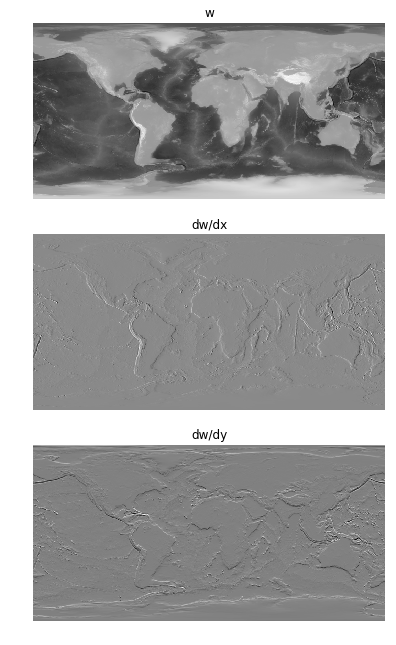

In [1]:
import numpy as np
import matplotlib.pyplot as plt

w = np.genfromtxt("altitude.txt")
h = 3e8 

dwdy,dwdx = np.gradient(w,h)

fig,(ax1,ax2,ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (8,11))
ax1.imshow(w,cmap = "gray")
ax1.set_title("w")
ax1.set_axis_off()
ax2.imshow(dwdx,cmap = "gray")
ax2.set_title("dw/dx")
ax2.set_axis_off()
ax3.imshow(dwdy,cmap = "gray")
ax3.set_title("dw/dy")
ax3.set_axis_off()
plt.show()

Now, using your values for the derivatives, calculate the intensity for each grid point, with $\theta=30^\circ$ and $\phi=45^\circ$. Make a density plot of the resulting values in which the brightness of each dot depends on the corresponding intensity value (choose a gray scale color map). If you get it working right, the plot should look like a relief map of the world - you should be able to see the continents and mountain ranges in 3D. (Common problems include a map that is upside-down or sideways, or a relief map that is "inside-out," meaning the high regions look low and *vice versa*.  Work with the details of your program until you get a map that looks right to you.)

Make sure that the shadows point in the correct direction.

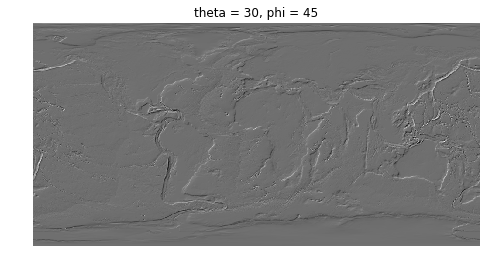

In [2]:
theta = np.deg2rad(30)
phi = np.deg2rad(45)

ax = np.cos(theta)*np.cos(phi)
ay = np.cos(theta)*np.sin(phi)
az = np.sin(theta)

I = (-1*ax*dwdx - ay*dwdy + az)/np.sqrt(dwdx**2 + dwdy**2 + 1)

plt.figure(figsize = (8,8))
plt.imshow(I,cmap = "gray")
plt.axis("off")
plt.title("theta = 30, phi = 45")
plt.show()

There is another file on CourseWeb called `stm.txt`, which you've seen before. It contains an STM image of the  surface of silicon. Modify the program you just wrote to visualize the STM data and hence create a 3D picture of what the silicon surface looks like. Use a pair of sliders from `ipywidgets` to adjust the angles $\theta$ and $\phi$ of the incoming illumination. The value of $h$ for the derivatives in this case is around $h=2.5$ (in arbitrary units).

You will need to fix the minimum and maximum values of your density plot to 0 and 1, respectively, or else auto-scaling will make the brightness of the surface appear to change in a counter-intuitive manner as you adjust the sliders.

In [3]:
import ipywidgets as wgt

w = np.genfromtxt("stm.txt")
h = 2.5

dwdy,dwdx = np.gradient(w,h)

theta_slider = wgt.IntSlider(description = "theta = ", min=0, max=180, step=1, value=90)
phi_slider = wgt.IntSlider(description = "phi = ", min=0, max=180, step=1, value=90)

@wgt.interact(theta_d = theta_slider, phi_d = phi_slider)
def show_earth(theta_d,phi_d):
    theta = np.deg2rad(theta_d)
    phi = np.deg2rad(phi_d)
    
    ax = np.cos(theta)*np.cos(phi)
    ay = np.cos(theta)*np.sin(phi)
    az = np.sin(theta)
    
    I = (-1*ax*dwdx - ay*dwdy + az)/np.sqrt(dwdx**2 + dwdy**2 + 1)
    
    plt.figure(figsize = (8,8))
    plt.imshow(I, vmin = 0, vmax = 1,cmap = "gray")
    plt.axis("off")
    plt.title("Scanning Tunneling Microscope")
    plt.show()
